In [1]:
from typing import List

from oop_functions.experiment_helper import *
from oop_functions.experiment_runner import ExperimentRunner
from oop_functions.util_functions import summarize_features, print_df
from oop_functions.visualization_util import *
from oop_functions.analytics_cv_util import *

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from xgboost import XGBClassifier

import itertools


In [2]:
def load_cv_analytics_util_see_stats(filesuffix):
    cv_analytics_util = CvAnalyticsUtil.load_cv_analytics_utils(filesuffix)
    cv_analytics_util.get_cv_report();
    cv_analytics_util.display_graph()
    return cv_analytics_util



Cross-Validation measures:
+--------------------+----------+-------------+-----------+----------+
|                    |     mean |         std |       min |      max |
|--------------------+----------+-------------+-----------+----------|
| precision__class_0 | 0.999762 | 0.00014609  | 0.99955   | 1        |
| recall__class_0    | 0.99688  | 0.000751701 | 0.995717  | 0.99786  |
| f1-score__class_0  | 0.998319 | 0.000397827 | 0.997631  | 0.998884 |
| precision__class_1 | 0.149361 | 0.0472859   | 0.0588235 | 0.25     |
| recall__class_1    | 0.690741 | 0.189089    | 0.375     | 1        |
| f1-score__class_1  | 0.244045 | 0.0725678   | 0.101695  | 0.390244 |
| accuracy           | 0.996645 | 0.000792696 | 0.995275  | 0.997772 |
| auc                | 0.992442 | 0.00890943  | 0.965145  | 0.999944 |
+--------------------+----------+-------------+-----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


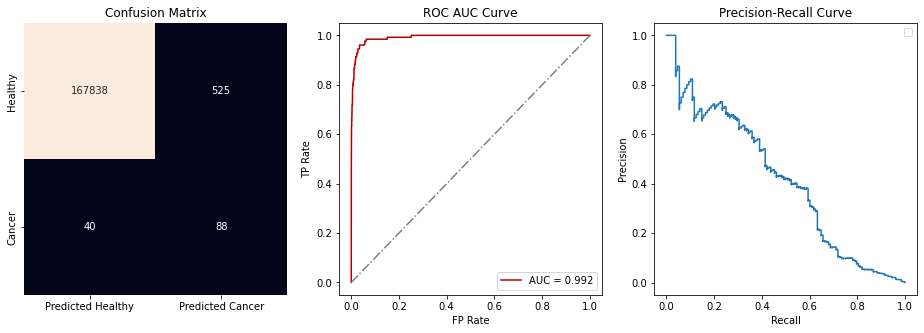

In [24]:
cv_analytics_util = load_cv_analytics_util_see_stats('experiment_participants_screened_single_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials')

In [25]:
id_col = 'index'
label = 'cancer_in_next_1_years'
id_and_confidence = []
for analytics_util in cv_analytics_util.analytics_utils:
    X_test = analytics_util.data_util.test_df[[id_col, 'plco_id', label]]
    X_test_mismatch = X_test.copy()
    y_pred, y_prob = analytics_util.get_predictions() 
    X_test_mismatch[f'{label}_pred'] = y_pred
    X_test_mismatch[f'{label}_prob'] = y_prob
    X_test_mismatch = X_test_mismatch[X_test_mismatch[label] != X_test_mismatch[f'{label}_pred']]
    X_test_mismatch = X_test_mismatch[X_test_mismatch[label] == 1]
    id_and_confidence.append(X_test_mismatch)
mid_conf_predictions = pd.concat(id_and_confidence)

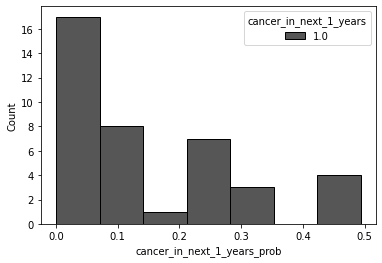

In [26]:
data = mid_conf_predictions
plt.title('')
sns.histplot(data = data, x = 'cancer_in_next_1_years_prob', hue=label, multiple='stack', palette= 'icefire');



Cross-Validation measures:
+--------------------+-----------+-------------+-----------+----------+
|                    |      mean |         std |       min |      max |
|--------------------+-----------+-------------+-----------+----------|
| precision__class_0 | 0.999615  | 0.000217872 | 0.999017  | 0.999823 |
| recall__class_0    | 0.996095  | 0.000968505 | 0.993717  | 0.997697 |
| f1-score__class_0  | 0.997852  | 0.000498489 | 0.996628  | 0.998585 |
| precision__class_1 | 0.0934393 | 0.058197    | 0.0138889 | 0.235294 |
| recall__class_1    | 0.497849  | 0.19081     | 0.153846  | 0.777778 |
| f1-score__class_1  | 0.153508  | 0.0845667   | 0.025641  | 0.333333 |
| accuracy           | 0.995715  | 0.00099252  | 0.993279  | 0.997176 |
| auc                | 0.961291  | 0.0289675   | 0.901795  | 0.992558 |
+--------------------+-----------+-------------+-----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


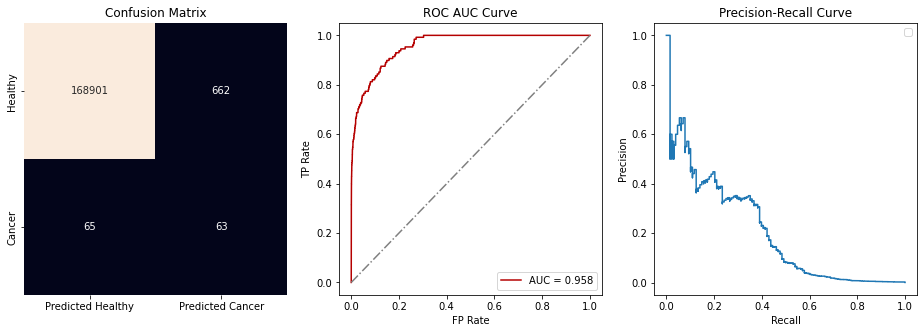

In [5]:
cv_analytics_util = load_cv_analytics_util_see_stats('experiment_participants_screened_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials')

In [22]:
id_col = 'index'
label = 'cancer_in_next_1_years'
id_and_confidence = []
for analytics_util in cv_analytics_util.analytics_utils:
    X_test = analytics_util.data_util.test_df[[id_col, 'plco_id', label]]
    X_test_mismatch = X_test.copy()
    y_pred, y_prob = analytics_util.get_predictions() 
    X_test_mismatch[f'{label}_pred'] = y_pred
    X_test_mismatch[f'{label}_prob'] = y_prob
    X_test_mismatch = X_test_mismatch[X_test_mismatch[label] != X_test_mismatch[f'{label}_pred']]
    X_test_mismatch = X_test_mismatch[X_test_mismatch[label] == 1]
    id_and_confidence.append(X_test_mismatch)
mid_conf_predictions_2 = pd.concat(id_and_confidence)

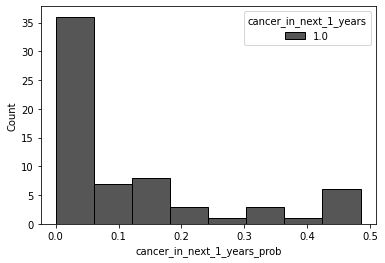

In [23]:
data = mid_conf_predictions_2
plt.title('')
sns.histplot(data = data, x = 'cancer_in_next_1_years_prob', hue=label, multiple='stack', palette= 'icefire');